## 代表的な前処理（無相関化・白色化）
- 相関係数が高い場合、一方の変数のみで事象を説明できることが多い
- これでは使える情報が減ってしまうため、相関を解消する前処理を施す

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### 無相関化

相関係数: -0.168


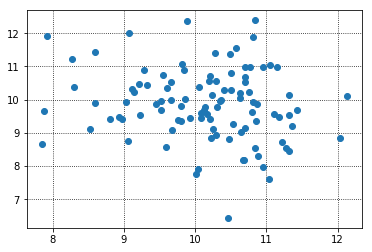

In [14]:
# 正の相関がある疑似データ
np.random.seed(1234)
data1 = np.random.multivariate_normal((10, 10), [[1, 0],[0, 1]], 100)
print('相関係数: {:.3f}'.format(np.corrcoef(data1[:, 0], data1[:, 1])[0,1]))

plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(data1[:, 0], data1[:, 1], 'o')
plt.show()

In [18]:
#  無相関化を行うための一連の処理
cov = np.cov(data1, rowvar=0) # 分散・共分散を求める
_, S = np.linalg.eig(cov)           # 分散共分散行列の固有ベクトルを用いて
data1_decorr = np.dot(S.T, data1.T).T #データを無相関化

In [21]:
# 無相関化を行うための一連の処理
cov = np.cov(data1, rowvar=0) # 分散・共分散を求める
cov

array([[ 0.79127964, -0.15977577],
       [-0.15977577,  1.14334245]])

In [25]:
_, S = np.linalg.eig(cov)           # 分散共分散行列の固有ベクトルを用いて
display(S)

array([[-0.93286363,  0.36022972],
       [-0.36022972, -0.93286363]])

In [26]:
S[0]

array([-0.93286363,  0.36022972])

In [28]:
S[1]

array([-0.36022972, -0.93286363])

In [24]:
data1_decorr = np.dot(S.T, data1.T).T #データを無相関化
data1_decorr[:10]

array([[-12.94169338,  -4.44549616],
       [-14.15482722,  -4.91857381],
       [-12.57830495,  -6.81351854],
       [-13.50351759,  -4.8229001 ],
       [-12.1376943 ,  -3.6285655 ],
       [-14.36108845,  -6.23741234],
       [-13.09213884,  -3.49736823],
       [-12.62004798,  -5.84865977],
       [-13.41330576,  -5.84996601],
       [-13.60615257,  -3.80736665]])

相関係数: 0.000


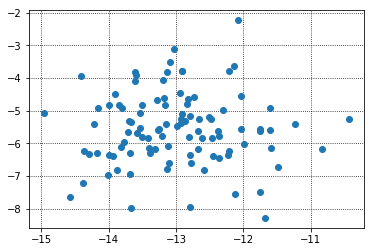

In [19]:
print('相関係数: {:.3f}'.format(np.corrcoef(data1_decorr[:, 0], data1_decorr[:, 1])[0,1]))
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(data1_decorr[:, 0], data1_decorr[:, 1], 'o')
plt.show()

- 無相関化によって説明変数間の相関がなくなったことがわかる
- ただし、スケールの影響がまだ残っているため次に標準化を施すことで、白色化を実現する

### 白色化

相関係数: 0.000


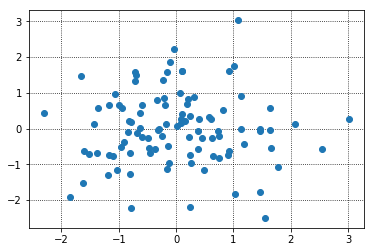

In [27]:
#  白色化を行うための一連の処理
stdsc = StandardScaler()
stdsc.fit(data1_decorr)
data1_whitening  = stdsc.transform(data1_decorr) # 無相関化したデータに対して、さらに標準化

print('相関係数: {:.3f}'.format(np.corrcoef(data1_whitening[:, 0], data1_whitening[:, 1])[0,1]))
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(data1_whitening[:, 0], data1_whitening[:, 1], 'o')
plt.show()